# Simple regression with Cross Validation

As a first step we need to create a (syntetic) dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

rcParams['figure.figsize'] = 12,10
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Let create x as an array of angles from 60 to 300 with steps equal to 4' and convert them in radiants

In [2]:
x = np.array([ i*np.pi/180 for i in range(60,300,4)])

Add some random noise ..

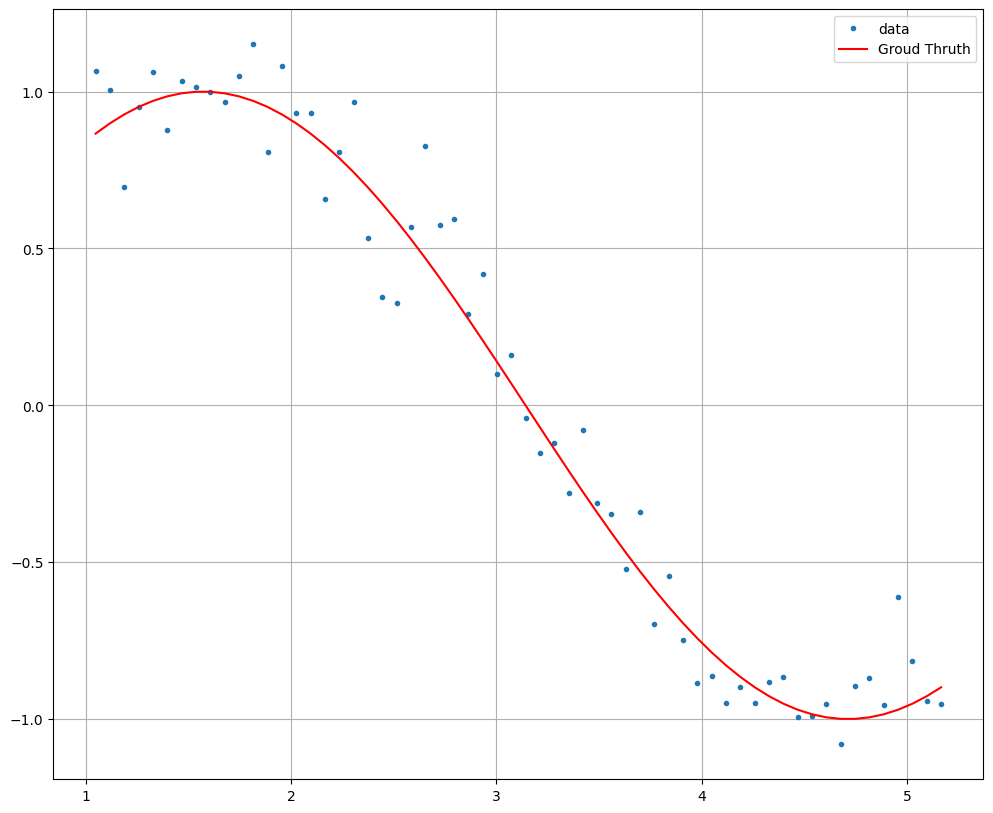

In [5]:
np.random.seed(10)  # initialize the "seed" of the random number generator (for experiment reproducibility)
y=np.sin(x) + np.random.normal(0, 0.15, len(x))

data=pd.DataFrame()
data['y']=y
data['x']=x

plt.plot(data['x'], data['y'], '.', label='data')
plt.plot(data['x'], np.sin(x), '-', color='red', label='Groud Thruth')
plt.grid()
plt.legend()
plt.show();

In [6]:
# now add the coloums related to the considereed powers of x
for i in range(2,16):
    colname='x_%d'%i
    data[colname]=data['x']**i
data.head()    

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


## Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

def linear_regression(data_train, data_test, power, models_to_plot={}):
    predictors=['x']
    if(power>1):
        predictors.extend(['x_%d'%i for i in range(2, power+1)])
        
    linreg = LinearRegression()
    
    linreg.fit(data_train[predictors], data_train['y'])
    y_pred_train = linreg.predict(data_train[predictors])
    y_pred_test = linreg.predict(data_test[predictors])

    rss_train = sum((y_pred_train-data_train['y'])**2)
    rss_test = sum((y_pred_test-data_test['y'])**2)
    
    ret = [rss_train, rss_test, linreg.intercept_]
    ret.extend(linreg.coef_)
      
    return ret
    

### Initialize the dataframe for storing the linear regression results

In [8]:
colNames = ['Fold', 'RSS_train', 'RSS_test', 'intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['polynomial_degree=%d'%i for i in range(1,16)]

linearModels = pd.DataFrame(pd.NA, index=ind, columns=colNames)

models_to_plot = { 1:(2,3,1), 3:(2,3,2), 6:(2,3,3), 9:(2,3,4), 12:(2,3,5), 15:(2,3,6)}

In [9]:
data_train, data_test = train_test_split(data, test_size=0.3, shuffle=True, random_state=2021)

for power in range(1,16):
    linearModels.iloc[power-1, 1:power+4] = linear_regression(data_train, data_test, power ,models_to_plot)

In [10]:
pd.options.display.float_format = '{:,.3g}'.format
linearModels

,Fold,RSS_train,RSS_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
polynomial_degree=1,<NA>,2.15,1.15,1.92,-0.612,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,<NA>,2.14,1.15,1.87,-0.568,-0.00708,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=3,<NA>,0.597,0.523,-0.952,2.87,-1.23,0.13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=4,<NA>,0.578,0.518,-0.16,1.54,-0.477,-0.0419,0.0139,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=5,<NA>,0.523,0.508,3.27,-5.69,5.15,-2.08,0.36,-0.0223,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=6,<NA>,0.517,0.492,0.227,2.05,-2.51,1.73,-0.645,0.112,-0.00721,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=7,<NA>,0.482,0.464,19.5,-55.5,67.2,-42.8,15.6,-3.28,0.372,-0.0175,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=8,<NA>,0.474,0.462,44.5,-141,188,-137,59,-15.6,2.49,-0.218,0.00805,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=9,<NA>,0.461,0.436,124,-446,688,-594,318,-110,24.6,-3.44,0.275,-0.00954,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=10,<NA>,0.457,0.45,244,-957,1.63e+03,-1.6e+03,989,-408,114,-21.2,2.53,-0.174,0.00531,<NA>,<NA>,<NA>,<NA>,<NA>


# Linear regression with K-Fold validation

The KFold object return the indices of the dataset raw ...

In [11]:
x=np.arange(1,21)
y=x+100
data2=pd.DataFrame()
data2['x']=x
data2['y']=y
data2

,x,y
0,1,101
1,2,102
2,3,103
3,4,104
4,5,105
5,6,106
6,7,107
7,8,108
8,9,109
9,10,110


In [13]:
def kf_test(data, kf):
    fold_id=1
    for train,test in kf.split(data):
        print('Fold %d Training'%fold_id)
        print(data.iloc[train])
        print('Fold %d Testing'%fold_id)
        print(data.iloc[test])
        fold_id = fold_id + 1
    return

kf = KFold(n_splits=5, shuffle=True, random_state=1)
kf_test(data2, kf)

Fold 1 Training
     x    y
0    1  101
1    2  102
2    3  103
4    5  105
5    6  106
7    8  108
8    9  109
9   10  110
11  12  112
12  13  113
13  14  114
14  15  115
15  16  116
17  18  118
18  19  119
19  20  120
Fold 1 Testing
     x    y
3    4  104
6    7  107
10  11  111
16  17  117
Fold 2 Training
     x    y
0    1  101
1    2  102
3    4  104
5    6  106
6    7  107
7    8  108
8    9  109
9   10  110
10  11  111
11  12  112
12  13  113
13  14  114
15  16  116
16  17  117
18  19  119
19  20  120
Fold 2 Testing
     x    y
2    3  103
4    5  105
14  15  115
17  18  118
Fold 3 Training
     x    y
2    3  103
3    4  104
4    5  105
5    6  106
6    7  107
8    9  109
9   10  110
10  11  111
11  12  112
12  13  113
14  15  115
15  16  116
16  17  117
17  18  118
18  19  119
19  20  120
Fold 3 Testing
     x    y
0    1  101
1    2  102
7    8  108
13  14  114
Fold 4 Training
     x    y
0    1  101
1    2  102
2    3  103
3    4  104
4    5  105
5    6  106
6    7  107
7  

## Now back to our linear regression example

In [14]:
nfolds = 5
npowers = 16

colNames = ['Fold', 'RSS_train', 'RSS_test', 'intercept'] + ['coef_x_%d'%i for i in range(1,npowers)]
ind=[]
for p in  range(1,npowers):
    ind.extend(['polynomial_degree=%d'%p for i in range(nfolds)] )

linearModelsKF = pd.DataFrame(pd.NA, index=ind, columns=colNames) # create a new result dataframe

kf = KFold(n_splits=nfolds, shuffle=True, random_state=1)
for power in range(1,npowers):
    fold=1
    for data_train_idx, data_test_idx in kf.split(data):
        data_train=data.iloc[data_train_idx]
        data_test=data.iloc[data_test_idx]
        row_id = (power-1)*nfolds+fold -1
        linearModelsKF.iloc[row_id, 1:power+4] = linear_regression(data_train, data_test, power)
        linearModelsKF.iloc[row_id, 0] = fold
        fold=fold+1

pd.set_option('display.max_rows', None)
linearModelsKF

,Fold,RSS_train,RSS_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
polynomial_degree=1,1,2.37,0.975,1.97,-0.613,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=1,2,2.61,0.674,1.97,-0.619,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=1,3,2.76,0.545,1.91,-0.608,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=1,4,2.61,0.727,1.95,-0.626,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=1,5,2.64,0.658,2.02,-0.634,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,1,2.37,0.975,1.97,-0.61,-0.000434,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,2,2.59,0.707,1.83,-0.515,-0.0168,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,3,2.76,0.555,1.95,-0.636,0.00454,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,4,2.58,0.785,1.8,-0.503,-0.0205,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
polynomial_degree=2,5,2.64,0.661,2.03,-0.643,0.00136,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### Alternative implementation of KFold Cross Validation

Using the KFold object inside the regression function

In [15]:
from sklearn.linear_model import LinearRegression

def linear_regression_kf(data, kf, power, models_to_plot={}):
    predictors=['x']
    if(power>1):
        predictors.extend(['x_%d'%i for i in range(2, power+1)])

    colnames = ['fold', 'RSS_train', 'RSS_test', 'Intercept'] + ['coef_x_%d'%i for i in range(1,power+1)]
    allret=pd.DataFrame(columns=colnames, index=range(kf.n_splits))
        
    linreg = LinearRegression()
    fold=1
    for train,test in kf.split(data):
        data_train = data.iloc[train]
        data_test = data.iloc[test]
        linreg.fit(data_train[predictors], data_train['y'])
        y_pred_train = linreg.predict(data_train[predictors])
        y_pred_test = linreg.predict(data_test[predictors])

        rss_train = sum((y_pred_train-data_train['y'])**2)
        rss_test = sum((y_pred_test-data_test['y'])**2)
        
        ret = [fold, rss_train, rss_test, linreg.intercept_]
        ret.extend(linreg.coef_)
        allret.iloc[fold-1]=ret
        fold = fold+1
      
    return allret

In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=220)
ret = linear_regression_kf(data, kf, 3)

ret

,fold,RSS_train,RSS_test,Intercept,coef_x_1,coef_x_2,coef_x_3
0,1,0.797,0.318,-1.24,3.24,-1.36,0.145
1,2,0.834,0.283,-0.936,2.85,-1.22,0.13
2,3,0.874,0.241,-1.12,3.04,-1.28,0.135
3,4,0.925,0.204,-1.33,3.29,-1.37,0.147
4,5,0.92,0.203,-0.848,2.81,-1.22,0.132


## Using sklearn tool

Machine learning pipelines (aka workflows) to execute a sequence of typical tasks: data normalization, imputation of missing values, outlier elicitation, dimensionality reduction, classification/regression

Available metrics for model selection can be retrive at https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

See, e.g., https://iaml.it/blog/optimizing-sklearn-pipelines , https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

In [17]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

predictors = ['x', 'x_2', 'x_3']

kf=KFold(5, shuffle=True)
scaler = StandardScaler()
model = LinearRegression()

pipe = make_pipeline(scaler, model)

cv_results = cross_validate(pipe, data[predictors], data['y'], cv=kf, scoring=('r2', 'neg_mean_squared_error'), return_estimator=True)

print('CV R2 scores:',cv_results['test_r2'])

print(cv_results)

mymodel = cv_results['estimator'][0]['linearregression']
# print('Model parameters:', mymodel.intercept_, *mymodel.coef_)


print(mymodel)

for pipeStep in cv_results['estimator']:
    currentModel = pipeStep['linearregression']
    print('Model parameters:',currentModel.intercept_, *currentModel.coef_)

    

CV R2 scores: [0.97417082 0.9637544  0.95025585 0.95232511 0.96166838]
{'fit_time': array([0.00329328, 0.00322914, 0.00319982, 0.00527883, 0.00339317]), 'score_time': array([0.00114536, 0.00117826, 0.00104856, 0.00368714, 0.00244355]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])], 'test_r2': array([0.97417082, 0.9637544 , 0.95025585, 0.95232511, 0.96166838]), 'test_neg_mean_squared_error': array([-0.02017275, -0.02078605, -0.02463994, -0.01467836, -0.021235

In [18]:
# Using the zip() function

In [19]:
list1=[1,2,3,4,5]
list2=['a','b','c','d','e']

for p1,p2 in zip(list1,list2):
    print(p1,p2)

# lists with different sizes
print('---------------')
list2=['a','b','c']
for p1,p2 in zip(list1,list2):
    print(p1,p2)
    
mydict = {}
for p1,p2 in zip(list1,list2):
    mydict[p1]=p2
mydict

1 a
2 b
3 c
4 d
5 e
---------------
1 a
2 b
3 c


{1: 'a', 2: 'b', 3: 'c'}

In [20]:
for pipeStep, r2 in zip(cv_results['estimator'], cv_results['test_r2']) :
    currentModel = pipeStep['linearregression']
    print('Model parameters:',currentModel.intercept_, *currentModel.coef_, ' R2=', r2)

Model parameters: 0.03910396807426557 3.4327032946266725 -9.305731943099186 5.269293157879141  R2= 0.9741708227118688
Model parameters: -0.004829784044555907 3.877756489685033 -10.334879779416863 5.835163938171268  R2= 0.9637543990435217
Model parameters: 0.016775172879706857 3.7046385039656933 -9.87912210868297 5.507080765412893  R2= 0.9502558547597096
Model parameters: 0.1661958381696608 3.4676357355389547 -9.208111467099734 5.100398311173824  R2= 0.9523251124268176
Model parameters: -0.02708521088390704 3.774859434289365 -10.087107743122136 5.702540494908197  R2= 0.961668375126805


### Plot the various models

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


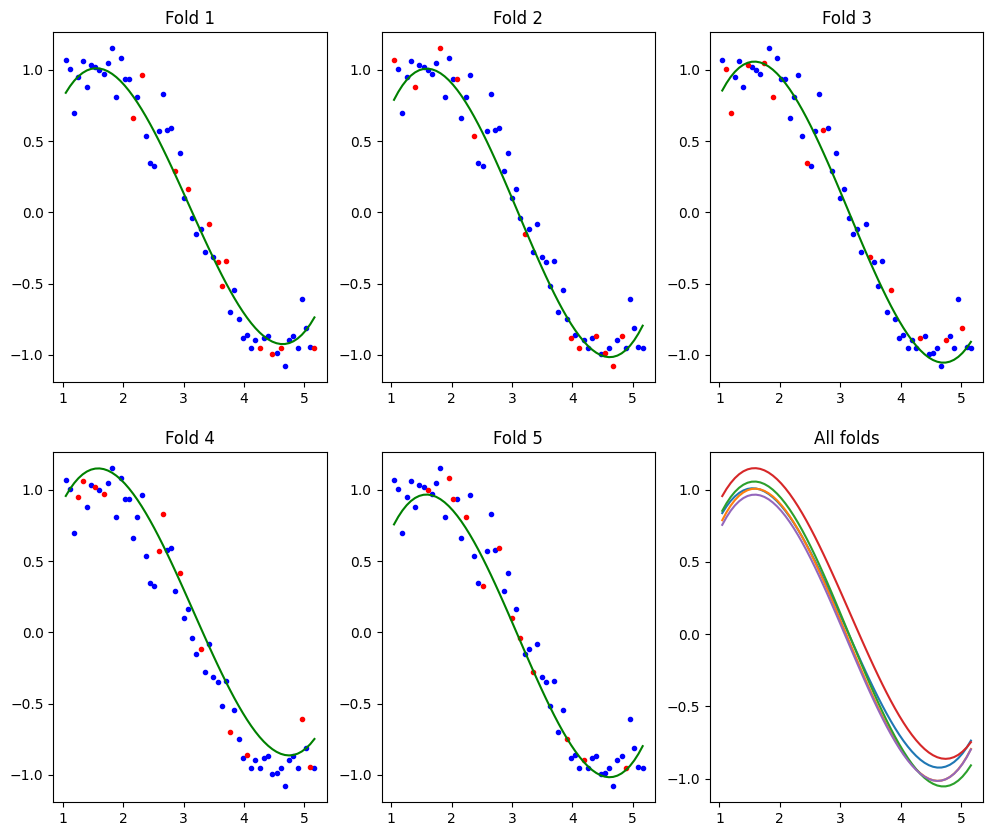

In [21]:
plt.figure()

allmodels = pd.DataFrame()
allmodels['x']=data['x']

scaler = StandardScaler()
scaler.fit(data)

split_id=1
x = data['x']
y = data['y']

xscaled = pd.DataFrame(scaler.transform(data), columns=data.columns)
for data_train_idx, data_test_idx in kf.split(data):
    plt.subplot(2, 3, split_id)
    plt.plot(x[data_train_idx], y[data_train_idx], '.', color='blue')
    plt.plot(x[data_test_idx], y[data_test_idx], '.', color='red')
    plt.title('Fold '+str(split_id))

    mymodel = cv_results['estimator'][split_id-1]['linearregression']
    yp = mymodel.predict(xscaled[predictors])    
    plt.plot(x, yp, color='green')
    allmodels['y%d'%split_id]=yp
    split_id = split_id + 1

plt.subplot(2,3,6)
for i in range(1,kf.n_splits+1):
    plt.plot(x, allmodels['y%s'%i])
#     plt.xlim(1,5)
#     plt.ylim(-1.2,1.2)
plt.title('All folds')
plt.show()             

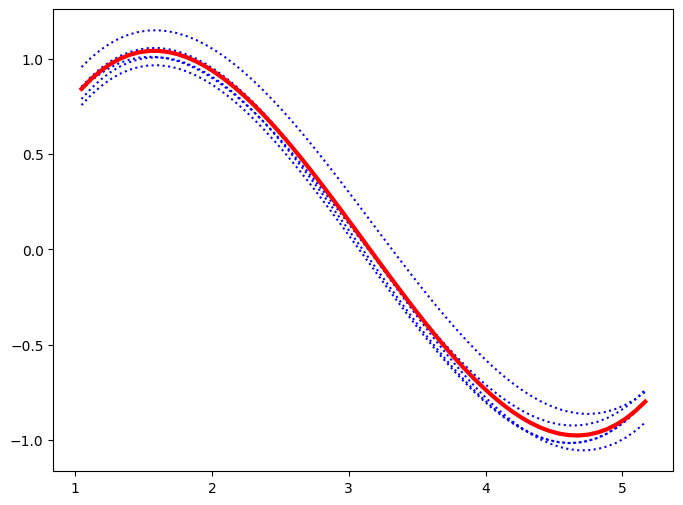

In [22]:
fulllinreg = LinearRegression()
fulllinreg.fit(data[predictors], data['y'])

plt.figure(figsize=(8,6))
for i in range(1,kf.n_splits+1):
    plt.plot(x, allmodels['y%s'%i], color='blue', linestyle=':')

plt.plot(x,fulllinreg.predict(data[predictors]), color='red', linewidth=3);

# Regularization approach

## Ridge regression

$ l(\hat{y},y)=  ||\hat{y}-y||_{l_2} + \alpha ||\bar{\theta}||_{l_2})$

where:

$ || \bar{\bf z} ||_{l_2} = \sqrt{\sum_{z \in \bar{\bf z}} z^2 }$

In [23]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    ridgereg = Ridge(alpha)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(*models_to_plot[alpha])
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss, ridgereg.intercept_]
    ret.extend(ridgereg.coef_)
    
    return ret

Initialize predictors, alpha values and result table

In [24]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_value  = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

colNames = ['RSS', 'intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha=%.2g'%alpha_value[i] for i in range(len(alpha_value))]

ridgeModels = pd.DataFrame(pd.NA, index=ind, columns=colNames)

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.93682e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.67054e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.72617e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.53536e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


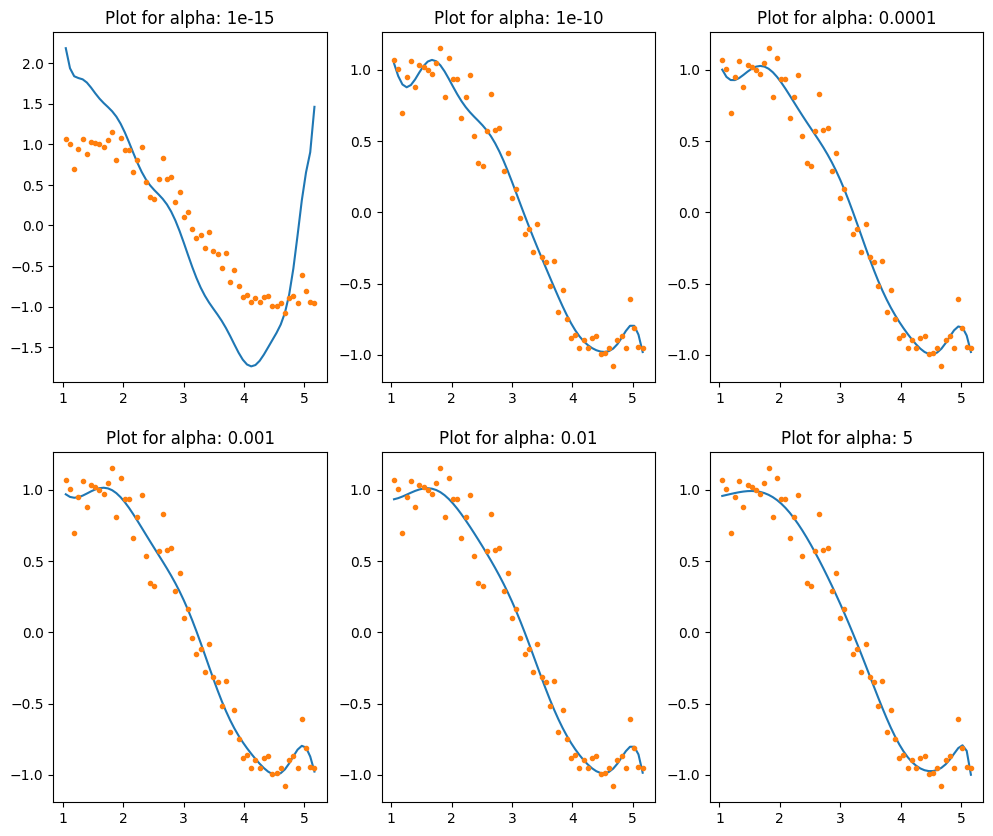

In [25]:
models_to_plot = {1e-15:(2,3,1), 1e-10:(2,3,2), 1e-4:(2,3,3), 1e-3:(2,3,4), 1e-2:(2,3,5), 5:(2,3,6)}

for i in range(len(alpha_value)):
    ridgeModels.iloc[i,] = ridge_regression(data, predictors, alpha_value[i], models_to_plot)

In [26]:
linearModels.iloc[-1:]

,Fold,RSS_train,RSS_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
polynomial_degree=15,<NA>,0.455,0.462,182,-550,509,97.6,-456,140,327,-451,300,-128,37.6,-7.75,1.1,-0.104,0.00583,-0.000147


In [27]:
ridgeModels

,RSS,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha=1e-15,32.8,-2.8e+04,1.91e+05,-5.93e+05,1.11e+06,-1.4e+06,1.26e+06,-8.35e+05,4.18e+05,-1.59e+05,4.58e+04,-9.98e+03,1.61e+03,-187,14.8,-0.707,0.0155
alpha=1e-10,0.853,74.7,-652,2e+03,-2.75e+03,1.1e+03,2e+03,-3.77e+03,3.26e+03,-1.8e+03,687,-186,35.9,-4.82,0.43,-0.0229,0.00055
alpha=1e-08,0.867,-5.81,64.9,-106,-9.49,132,-49,-123,177,-118,48.7,-13.5,2.54,-0.323,0.0265,-0.00126,2.61e-05
alpha=0.0001,0.892,6.25,-5.95,-3.3,2.24,4.01,0.0193,-3.59,-0.137,3.37,-2.77,1.14,-0.285,0.0444,-0.00424,0.000224,-4.98e-06
alpha=0.001,0.912,2.52,-1.39,-1.09,0.0946,0.932,0.576,-0.451,-0.607,0.324,0.307,-0.356,0.156,-0.0379,0.00534,-0.000412,1.35e-05
alpha=0.01,0.926,1.24,-0.306,-0.279,-0.0106,0.255,0.248,-0.0638,-0.282,0.00219,0.286,-0.236,0.0938,-0.0216,0.00295,-0.000222,7.17e-06
alpha=1,0.943,0.868,0.00735,0.018,0.027,0.0267,0.0122,-0.0106,-0.0205,-0.0017,0.0167,-0.00843,0.00111,0.000292,-0.000119,1.52e-05,-6.99e-07
alpha=5,0.947,0.915,0.00324,0.00757,0.0116,0.0131,0.00962,0.00132,-0.00704,-0.00793,0.000764,0.00895,-0.00684,0.00231,-0.000417,3.92e-05,-1.52e-06
alpha=10,0.949,0.933,0.00252,0.00586,0.00907,0.0104,0.00793,0.00122,-0.0061,-0.00684,0.00158,0.00644,-0.00516,0.00177,-0.00032,3.02e-05,-1.17e-06
alpha=20,0.951,0.949,0.00173,0.00404,0.00636,0.00754,0.00614,0.0015,-0.00432,-0.00586,0.000557,0.00594,-0.00447,0.00149,-0.000267,2.5e-05,-9.65e-07


## Using the pipeline

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

alpha_value  = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
kf=KFold(5, shuffle=True)


predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,8)])


scaler = StandardScaler()


for alpha in alpha_value:
    model = Ridge(alpha)
    pipe = make_pipeline(scaler, model)

    cv_results = cross_validate(pipe, data[predictors], data['y'], cv=kf, scoring=('r2', 'neg_mean_squared_error'), return_estimator=True)

    print(f"alpha={alpha}  \t: CV R2 scores: {cv_results['test_r2']}")


alpha=1e-15  	: CV R2 scores: [0.92912048 0.94138683 0.96943175 0.9752719  0.96145095]
alpha=1e-10  	: CV R2 scores: [0.97876992 0.96051652 0.95624884 0.95693147 0.97242873]
alpha=1e-08  	: CV R2 scores: [0.99157583 0.95253426 0.85724634 0.94688614 0.97830419]
alpha=0.0001  	: CV R2 scores: [0.94851671 0.97703552 0.95993256 0.95745454 0.97196761]
alpha=0.001  	: CV R2 scores: [0.96224017 0.92035303 0.98215472 0.92210512 0.97121098]
alpha=0.01  	: CV R2 scores: [0.95484699 0.95020578 0.96469849 0.99020743 0.93180443]
alpha=1  	: CV R2 scores: [0.92035973 0.94718967 0.96320319 0.95566237 0.91037141]
alpha=5  	: CV R2 scores: [0.87968624 0.94878332 0.94666115 0.83597781 0.9425992 ]
alpha=10  	: CV R2 scores: [0.89654125 0.90479148 0.92196331 0.88213635 0.89788666]
alpha=20  	: CV R2 scores: [0.66914268 0.92624777 0.89903973 0.83938459 0.78880515]
